# Time Series

*Tuesday, September 24*

This Notebook walks us through the tools we need to analyse time series in Python. We will cover MA, AR and ARMA processes, covariance stationarity, smoothing and filtering, martingales and predictions of time-series.
Some familiarity with time-series is required.

### Content

- [1. Short introduction to properties of time-series](#1.-Short-introduction-to-properties-of-time-series)



### 1. Short introduction to time-series

#### 1.1. Covariance stationarity and stationarity

A time series is a series of data points indexed by time. Formally, it is a sequence of random variables ${X_t}$, where $t \in \mathbb N$ or $t \in \mathbb Z$, and $X_t \in \mathbb R, \forall t$. A time series is said to be covariance stationary if:
* its mean is constant across times/does not depend on $t$: $\mathbb E [X_t] = \mu \quad \forall t$
* its variance is constant in each time $t$: $ \mathrm{Var}[X_t] = \sigma^2 \quad$
* its autocovariance is finite and constant for two random variables equally spaced in time: $\mathrm{cov}(X_t, X_{t+k}) = \mathrm{cov}(X_{t+n}, X_{t+n+k})$

Developping a formal understanding of time-series is an essential step before moving on to forecasts of the series.

#### 1.2. Examples

White noise is a stationary process. White noise is a random signal with equal intensity at all frequencies. It is defined as  a random process with mean zero, constant variance and 0 auto-covariance. $$X_t = \epsilon_t$$ with $$\epsilon_t \sim \mathcal{N}(0, \sigma^2)$$ is a white noise process for instance. Moving Average (MA) processes are defined as sums of white noise processes with finite coefficients: *e.g.* $$Y_t = \sum_{k=0}^{K} \beta_k \epsilon_{t-k}$$ They also exhibit covariance stationarity.

See the graphs of these processes below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
%matplotlib nbagg

No handles with labels found to put in legend.
No handles with labels found to put in legend.


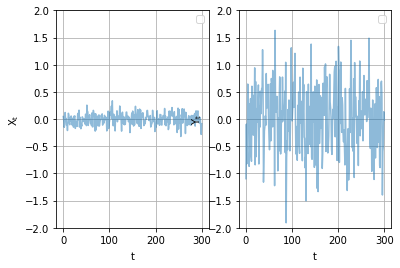

In [2]:
np.random.seed(123456)

t = np.linspace(0, 300, 300)

alpha = 0
epsilon = np.random.normal(loc=0.0, scale = .1, size=len(t))
wn = alpha + epsilon

# Creating MA process with specific coefficients
ma = np.zeros(len(t))
coeffs = [10, 7, 6, 1, 7, 8, 3, 4, 2, 1]
for i in range(10):
    ma = ma + np.random.normal(loc=0.0, scale = coeffs[i]*i*0.01, size=len(t))

# Plotting the two time series
plt.figure(1)
plt.subplot(121)
plt.plot(t, wn, alpha=0.5)
plt.xlabel("$\mathrm{t}$")
plt.ylabel("$\mathrm{X_t}$")
plt.legend()
plt.ylim(-2, 2)
plt.grid()

plt.subplot(122)
plt.plot(t, ma, alpha=0.5)
plt.xlabel("$\mathrm{t}$")
plt.ylabel("$\mathrm{Y_t}$")
plt.legend()
plt.ylim(-2, 2)
plt.grid()

It is easy to verify that they are covariance stationary.

0-mean processes can describe a wide variety of time-series with real applications in economics and finance. The 0-mean assumption is also without loss of generality as this does not affect the variance and covariance of the processes, and the mean of the random variables holds up to an additive constant.

#### 1.3. Wold's decomposition theorem

In particular, [Wold's representation theorem](https://en.wikipedia.org/wiki/Wold%27s_theorem) (Herman Wold, 1908-1992) says that every covariance-stationary time series $X_t$ can be written as the sum of two time series, one *deterministic* and one *stochastic*.

Formally
$$X_{t}=\sum _{k=0}^{\infty }b_{k}\varepsilon _{t-k}+\eta _{t}$$
where:
* $X_t$ is any covariance-stationary process
* $\varepsilon_t$ terms are white noises
* $\beta_k$ coefficients are potentially infinitely many linear filter weights. They must be square summable ( $\sum _{k=0}^{\infty }|b_{k}|^{2} < \infty$ ), constant, and causal (*i.e.* $k \geq 0$)
* $\eta_t$ is a deterministic time series, for instance a sine wave sampled every $\dfrac{\pi}{8}$

#### 1.4. AR(p) processes

Auto-regressive processes of order $p$ are defined as $$ X_{t}=c+\sum _{k=1}^{p}\varphi _{k}X_{t-k}+\varepsilon _{t}$$ 

They are common in economics and finance. With many applications to financial and macroeconomic time series. For an AR(p) process to be stationary, the roots of the polynomial $ \Phi (z):=\textstyle 1-\sum _{i=1}^{p}\varphi _{i}z^{i} $ must lie outside the unit circle, *i.e.*, each (complex) root $ z_{i} $ must satisfy $ |z_{i}|>1 $. For an AR(1) process, this simply means: $|\varphi_1 | < 1 $.

##### 1.4.1. AR(1) processes

An AR(1) process is simply defined as $$ X_t = \varphi X_{t-1} + \varepsilon_t $$ or by repeated substitutions: $$ X_t = \sum_{k=0}^{\infty} \varphi^k \varepsilon_{t-k}$$ 

We get:
$$ \mathbb E[X_t] = 0, \quad \mathrm{cov}(X_t, X_{t-k}) = \sigma^2 \dfrac{\varphi^k}{1-\varphi^2}, \quad \mathrm{and} \quad \mathrm{Var}(X_t) = \dfrac{\sigma^2}{1 - \varphi^2} $$

We can visualise such process easily:

In [3]:
# Time
t = np.linspace(1, 50, 50)

# Parameters
np.random.seed(123456)
epsilon2 = np.random.normal(loc=0.0, scale = 0.5, size=len(t))
phi = 0.85

# Series
X_t = np.zeros(len(t))
X_t[0] = 1
for k in range(1, len(t)):
    X_t[k] = X_t[k-1]*phi + epsilon2[k]

X_neg_t = np.zeros(len(t))
X_neg_t[0] = 1
for k in range(1, len(t)):
    X_neg_t[k] = X_neg_t[k-1]*(-phi) + epsilon2[k]    

# Covariances
acov1 = [phi**k/(1 - phi**2) for k in t]
acov2 = [(-phi)**k/(1 - phi**2) for k in t]

For both series, the autocovariance of the $k^{th}$ term with the first term deacreases asymptotically toward zero as time elapses.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


(-4, 4)

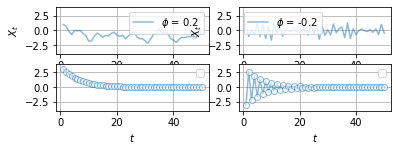

In [4]:
# Plot
plt.figure(2)
plt.subplot(421)
plt.plot(t, X_t, alpha=0.5, label = '$\phi $ = 0.2')
plt.grid()
plt.ylabel("$X_t$")
plt.legend()
plt.ylim(-4, 4)

plt.subplot(423)
plt.plot(t, acov1, marker='o', fillstyle='full', markerfacecolor='white', alpha=0.5)
plt.grid()
plt.xlabel("$t$")
plt.legend()
plt.ylim(-4, 4)

plt.subplot(422)
plt.plot(t, X_neg_t, alpha=0.5, label = '$\phi $ = -0.2')
#plt.xlabel("$\mathrm{t}$")
plt.ylabel("$X_t$")
plt.legend()
plt.grid()
plt.ylim(-4, 4)

plt.subplot(424)
plt.plot(t, acov2, marker='o', fillstyle='full', markerfacecolor='white', alpha=0.5)
plt.grid()
plt.xlabel("$t$")
plt.legend()
plt.ylim(-4, 4)



##### 1.4.2. Properties of AR(p) processes

#### 1.5. MA(p) processes

##### 1.5.1. MA(1) process

A moving average process of order $p$ is defined as $$X_t = \mu + \sum_{k=0}^p \varphi_k \varepsilon_{t-k}$$ and its properties are:

$$ \mathrm{var}(X_t) = \sigma^2 (1 + \sigma^2), \quad \mathrm{cov}(X_t, X_{t+1}) = \sigma^2 \varphi, \quad \mathrm{and}  \quad \mathrm{cov}(X_t, X_{t+k}) = 0 \quad \mathrm{for} \quad k>1  $$

##### 1.5.2. Properties of MA(p) processes

#### ARMA(p, q) processes

Simply defined as $$ X_t = \sum_{k=0}^p \theta_i X_{t-i} + \sum_{i=0}^q \varphi_k \varepsilon_{t-k} $$

Or with the lag operator $L^k X_t = X_{t-k}$, the expression above can be re-written:

$$\begin{split}
X_t - \sum_{k=0}^p \theta_i L^k X_t = & \sum_{i=0}^q \varphi_k L^i \varepsilon_t \\
L^0 X_t - \theta_1 L^1 X_t - ... - \theta_p L^p X_t = & L^0 \varepsilon_t + \varphi_1 L^1 \varepsilon_t + ... + \varphi_q L^q \varepsilon_t
\end{split}$$

Defining the polynomials  $ \theta(x) $ and $ \varphi(x) $ to be the corresponding polynomials of the left- and right-hand sides respectively:

$$\begin{split}
\theta(x) := 1 - \theta_1 x - ... - \theta_p x^p
\quad \text{and} \quad
\varphi(x) := 1 + \varphi_1 x + ... + \varphi_q x^q
\end{split}$$

We get the following sufficient condition for the covariance-stationarity of $X_t$: 
**$X_t$ is covariance-stationary if the roots of of the $\theta(x)$ polynomial associated with the AR(p) part of the ARMA(p, q) process lie outside of the unit disk in the complex plane.**


### 2. Time series in statsmodels

`statsmodels` provides us with the tools necessary to analyse and tests ARMA processe sin Python. These functions are accessed through the `tsa` submodule of `statsmodels`.

Other available modules to deal with time-series are the QuantEcon `arma.py` module (imported through the [`QuantEcon.py` package](https://quantecon.org/quantecon-py)), and the probabilistic programming module [PyMC3](https://docs.pymc.io/), which we'll cover later in this lecture.

In this section, we provide a partial overview of some of the most useful functionalities of `tsa` for social science research.


#### Seasonal decomposition

Many socio-economic time series such as GDP, average education, consumer price indices, or life expectancy have a persistent growth trend that makes them unsuitable for analytical techniques designed for stationary time series.

`seasonal_decompose` can be used to separate additive or multiplicative time trends in a time series from seasonal fluctuations.
We can try to decompose US real GDP. We purposedly use a non-seasonally adjusted dataset. On the St.-Louis Fed's website, we can find such time-series, covering the 1947-2019 period, measured in US$ millions. You can find this series [here](https://fred.stlouisfed.org/series/NA000334Q)

In [5]:
gdp = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=NA000334Q&scale=left&cosd=1947-01-01&coed=2019-04-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2019-09-11&revision_date=2019-09-11&nd=1947-01-01',
                parse_dates=['DATE'], index_col='DATE')
print(gdp.head())
print(gdp.dtypes)

            NA000334Q
DATE                 
1947-01-01    58497.0
1947-04-01    60672.0
1947-07-01    62196.0
1947-10-01    68250.0
1948-01-01    64258.0
NA000334Q    float64
dtype: object


C:\Users\dyevre\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


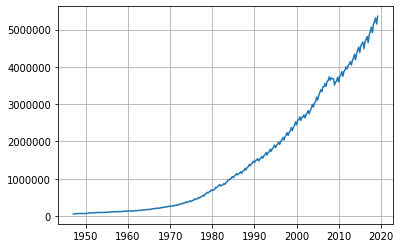

In [6]:
plt.figure(3)
plt.plot(gdp['NA000334Q'])   # Note: we do not need to specify the dates here as they are already defined as indices
plt.grid()

It is rather obvious that we would need a multiplicative decomposition, but we try both here for the sake of exposition. The `seasonal_decompose` is useful in that it stores the trend --multiplicative or additive--, the seasonal component, and the residual in a custom-made container `DecomposeResult`.

Note how the residual of the additive decomposition still have some pattern.

Text(0.5, 0.98, 'Additive Decompose')

<Figure size 432x288 with 0 Axes>

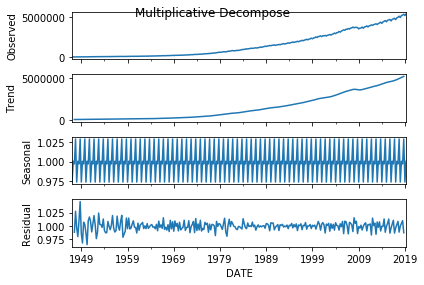

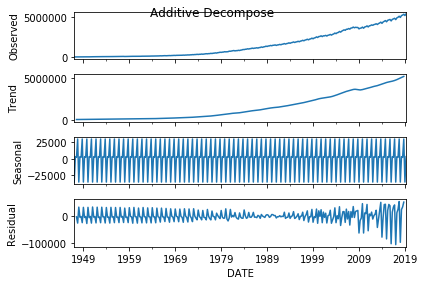

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative decomposition 
mul = seasonal_decompose(gdp['NA000334Q'], model='multiplicative')

# Additive decomposition
add = seasonal_decompose(gdp['NA000334Q'], model='additive')

plt.figure(2)
mul.plot().suptitle('Multiplicative Decompose')
add.plot().suptitle('Additive Decompose')

Let's now store all the separate components of the decompositions, so as to be able to re-use them later. We wrap them in a Panda dataframe:

In [8]:
gdp_add = pd.concat([add.seasonal, add.trend, add.resid, add.observed], axis=1)
gdp_mul = pd.concat([mul.seasonal, mul.trend, mul.resid, mul.observed], axis=1)
gdp_add.columns = ['Seasonal', 'Trend', 'Residual', 'Observed']
gdp_mul.columns = ['Seasonal', 'Trend', 'Residual', 'Observed']

gdp_add.head()

,Seasonal,Trend,Residual,Observed
DATE,,,,
1947-01-01,-35120.442421,NaN,NaN,58497.0
1947-04-01,3216.837509,NaN,NaN,60672.0
1947-07-01,2090.884922,63123.875,-3018.759922,62196.0
1947-10-01,29812.719991,64577.375,-26140.094991,68250.0
1948-01-01,-35120.442421,66208.500,33169.942421,64258.0


#### Transforming non-stationary series into stationary ones

#### Martingales

#### Time series forecasting

[Link](https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/)

Statsmodels provides us with many tools to model and predict time series: it handles AR, MA, ARMA, ARIMA, SARIMA, VAR, and VARMA among other.

We briefly review them below.

##### AR

Here we define a simple AR process, and get `statsmodels` to estimate its coefficients and predict its next value. We plot the process for more clarity.

Let's work with the following AR(2) process:

$$ X_t = \alpha + \varphi_1 X_{t-1} + \varphi_2 X_{t-2} + \varepsilon_t \\
\mathrm{with} \quad \alpha = 2, \quad \varphi_1 = 0.5, \quad \varphi_2 = 0.9\\
\mathrm{and} \quad \varepsilon_t \sim \mathcal{N}(0, 1) $$

In [9]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from matplotlib import pyplot as plt

def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

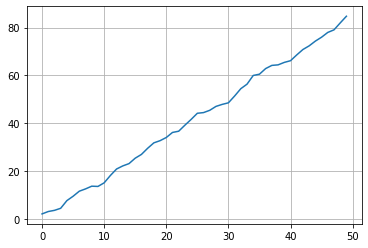

In [10]:
# Time
t = np.linspace(1, 50, 50)

# Parameters
np.random.seed(123456)
epsilon = np.random.normal(loc=0.0, scale = 1, size=len(t))
α, phi_1, phi_2 = 2, 0.5, 0.9

# Series
X_t = np.zeros(len(t))
X_t[0], X_t[1] = 2, 3    # Initialising the series
for k in range(2, len(t)):
    X_t[k] = α + phi_1*X_t[k-1] + phi_1*X_t[k-1] + epsilon[k]
    
# Plotting the series
plt.figure(3)
plt.plot(X_t)
plt.grid()

To facilitate the exposition of the properties of the time series we manipulate, we use a very helpful bit of code written by an IBM data scientist [Sean Abu](http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/). This code allows us to generate 5 informative time series plots in one line. We get:
* The line plot of the series wrt time
* The evolution of the autocorrelation function (ACF) over time
* The partial autocorrelation function (PACF) of the series
* Quantile-quantile plots of the distribution of our data compared to that of a normal distribution
* A probability plot (two cdfs plotted against each other), comparing the empirical cdf to that of the normal distribution

See below:

<Figure size 432x288 with 0 Axes>

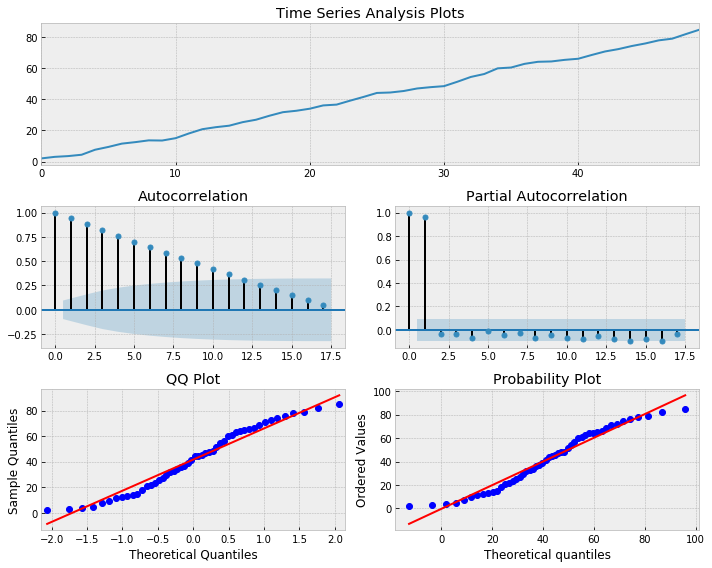

In [11]:
plt.figure(4)
tsplot(X_t)

Now we can estimate the parameters of the model using `statsmodels.tsa.ar_model.AR`.

When estimating the model parameters, `statsmodels` is fitting an unconditional maximum likelihood process.

Below, we use the `ARMA` function from `statsmodels.tsa.arima_model`. It takes as arguments:
* The time series we wish to analyse
* The functional form we impose on it. For instance, if we expect the process to be an ARMA(2, 0)=AR(2), as defined above, we type `ARMA(data_series, order=(2, 0))`

In [12]:
from statsmodels.tsa.arima_model import ARMA

# We define the model and estimate it with the same syntax as OLS
ar20_model = ARMA(X_t, order=(2,0))
model_fit20 = ar20_model.fit()

# Predicting the value coming after the last one
y_hat20 = model_fit20.predict(len(X_t), len(X_t))

# Predicting the 10 values before the last one (in-sample), and the 20 values coming after the last one 
y_hat20_2 = model_fit20.predict(len(X_t)-10, len(X_t)+20)

# Results
print('constant, phi_1 and phi_2:', model_fit20.params)
print('y_41 = ', y_hat20)
print('y_41 to y_71 = ', y_hat20_2)

constant, phi_1 and phi_2: [ 1.80449990e+03  1.91530656e+00 -9.15307198e-01]
y_41 =  [87.30895868]
y_41 to y_71 =  [ 66.36598547  66.77342846  70.75074925  72.90194251  73.74461998
  76.14993809  77.4683333   79.78838426  80.02607127  84.58652728
  87.30895868  89.66125411  91.81542     93.78823512  95.59505733
  97.24994386  98.76576154 100.15428751 101.42630159 102.59167069
 103.65942613 104.63783439 105.53446192 106.35623439 107.10949096
 107.80003394 108.4331743  109.01377321 109.5462802  110.03476795
 110.48296427]


C:\Users\dyevre\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\dyevre\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Note that if we force a different model to be estimated on this data, such as ARMA(3, 0). We get parameter values that are wide off the mark:

In [13]:
ar30_model = ARMA(X_t, order=(3,0))
model_fit30 = ar30_model.fit()

# Predicting the value coming after the last one
y_hat30 = model_fit30.predict(len(X_t), len(X_t))

# Predicting the 10 values before the last one (in-sample), and the 20 values coming after the last one 
y_hat30_2 = model_fit30.predict(len(X_t)-10, len(X_t)+20)

# Results
print('constant, phi_1, phi_2 and phi_3:', model_fit30.params)
print('y_41 = ', y_hat30)
print('y_41 to y_71 = ', y_hat30_2)

constant, phi_1, phi_2 and phi_3: [ 1.70948694e+03  1.52010813e+00 -1.62413568e-01 -3.57696134e-01]
y_41 =  [87.23758148]
y_41 to y_71 =  [ 66.03978291  66.86492027  70.05066869  72.86707067  73.95659788
  75.91307839  77.53308286  79.58760087  80.31512537  83.82882806
  87.23758148  89.54247093  91.63711896  93.55356233  95.30211417
  96.89959813  98.35845355  99.69116824 100.90868691 102.02116904
 103.03781374 103.96703969 104.81651616 105.59324346 106.30360591
 106.95342815 107.54802337 108.09223853 108.59049519 109.04682686
 109.46491303]


C:\Users\dyevre\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\dyevre\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


We can now compare the results of our predictions generated by the two models.

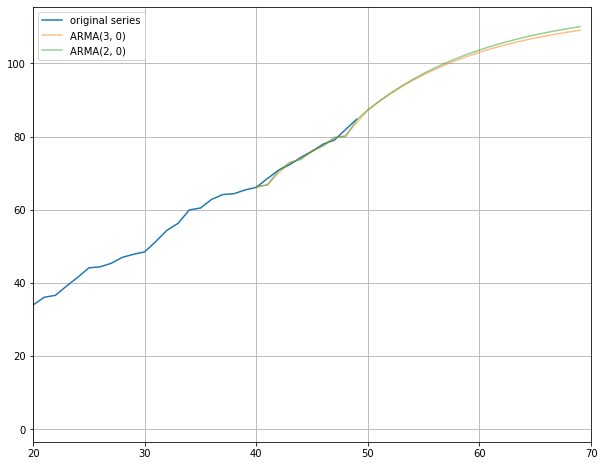

In [14]:
# Defining numpy arrays containing the predicted values, and starting at index 
graph20, graph30 = np.full(71, np.nan), np.full(71, np.nan)
for k in range(30):
    graph20[40+k] = y_hat20_2[k]
    graph30[40+k] = y_hat30_2[k]

# Figure
plt.figure(5, figsize=(10,8))
plt.plot(X_t, label='original series')
plt.plot(graph30, label='ARMA(3, 0)', alpha=0.5)
plt.plot(graph20, label='ARMA(2, 0)', alpha=0.5)
plt.legend()
plt.xlim(20, 70)
plt.grid()

#### MA and ARMA processes with `statsmodels`

It is straightforward re-use the code above to analyse MA and ARMA processes:
* Fitting an MA model to a time series requires aline like: `model = ARMA(data, order=(0, q))`, with $q \neq 0$
* Fitting an ARMA model requires `model = ARMA(data, order=(p, q))` instead, with $p \neq 0$ and $q \neq 0$

#### ARIMA(p, d, q) processes

Autoregressive integrated moving average (ARIMA) models are applied to non-stationary processes that can be turned to stationary ones after first differencing the process d times.

Examples:
* ARIMA(0, 1, 0) is a process such as $X_{t}=X_{t-1}+\varepsilon _{t}$. This is simply a random walk
* ARIMA(0, 1, 0) with a constant, or a random walk with driff. *E.g.* by $ X_{t}=c+X_{t-1}+\varepsilon _{t}$
* ARIMA(0, 0, 0) is a white noise process 

They are estimated just like the previous models (`model = ARIMA(data, order=(p, q, q))`).

We can compare the in-sample and out-of-sample predictions of different models. For this, we will use some helpful plotting functions from `statsmodels`, such as `.plot_predict()`

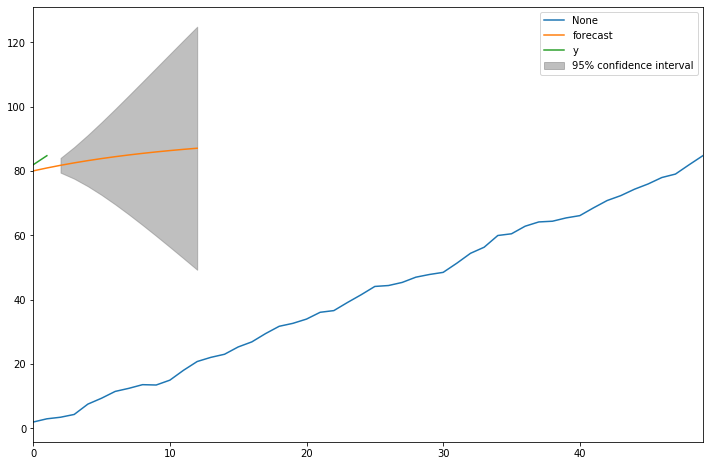

In [15]:
X_t = pd.Series([X_t[k] for k in range(50)])

fig, ax = plt.subplots(figsize=(12, 8))
ax = X_t.loc[0:].plot(ax=ax)
fig = model_fit20.plot_predict(48, 60, 
                              dynamic=True, 
                             ax = ax,
                              plot_insample=True)
plt.show() 




#### Standard filters

The goal of a time series filter is to separate a the trend from the cyclcical component of a series. They are particularly useful for extracting business cycles from macroeconomic aggregate variables such as GDP, prices and employment.

In this section, we apply the Hodrick-Prescott, Baxter-King and Christiano-Fitzgerald filters to income, inflation and unemployment time series.

This section is based on the exposition of filters from the [`statsmodel` documentation](https://www.statsmodels.org/dev/examples/notebooks/generated/tsa_filters.html).

#### Hodrick-Prescott filter

The HP filter takes as an input a time series $ y_{t}\ =\tau _{t}\ +c_{t}\ +\epsilon _{t}$, where $\tau _{t}$ is the trend component, $c_{t}$ is the cyclical one, and $\epsilon_t$ is an error. Given an adequately chosen positive penalty $\lambda$, there is an optimal trend component $\tau_t$ that solves:
$$ \min _{\tau_t }\left(\sum _{t=1}^{T}{(y_{t}-\tau _{t})^{2}}+\lambda \sum _{t=2}^{T-1}{[(\tau _{t+1}-\tau _{t})-(\tau _{t}-\tau _{t-1})]^{2}}\right) $$ 

The first term is the sum of the squared deviations of the actual data from the trend: it penalises the cyclcical component. The second term is the sum of the squared differences between two consecutive growth terms, it penalises rapid changes in the growth of the trend component. Higher $\lambda$'s increase the smoothing.

Hodrick and Prescott suggest to use a value of 1600 for $\lambda$, when using quarterly data. 

We show a simple application of the HP filter on GDP data. For that, we use one of the default `statsmodels` datasets on US GDP. You can have a peak at the available datasets in the `statsmodels` library by typing `sm.datasets.` + `TAB`.

In [21]:
# Loaing the dataset
data = sm.datasets.macrodata.load_pandas().data

# Getting a sense of what the dataset looks like
print(sm.datasets.macrodata.NOTE)
print(data.head())

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

We have data on deflated GDP, consumption, investment, inflation and many other macroeconomic variables, from 1959 to 2009, by quarter.

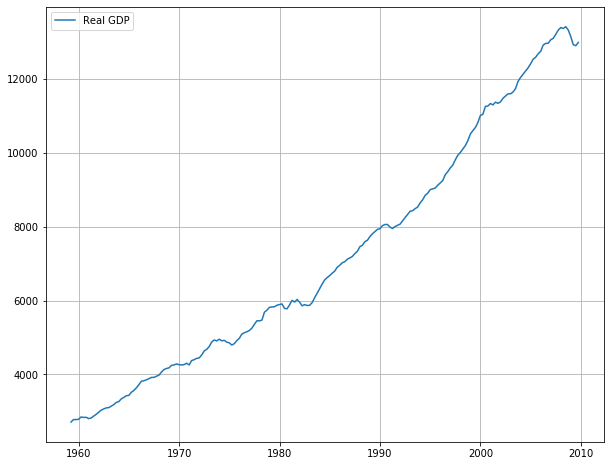

In [24]:
# Defining the date as the index
data.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

# Figure
plt.figure(6, figsize=(10,8))
plt.plot(data.realgdp, label='Real GDP')
plt.legend()
plt.grid()

Now that our data is loaded and indexed, we can apply the HP filter. It takes as an argument a one-dimensional array of the time-series to filter, and the smoothing parameter $\lambda$ (default = 1,600). It outputs two time series:
* The cycle $c_t$
* The optimal trend $\tau_t$

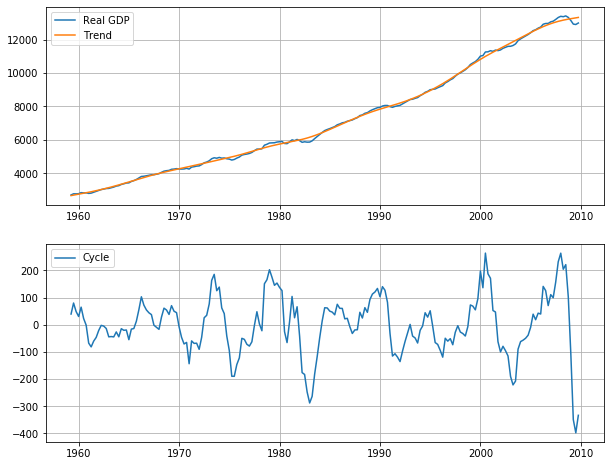

In [31]:
# Detrending
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(data.realgdp, lamb=1600)

# Creating a new data frame with the original data and the two new time series
gdp_decomp = data[['realgdp']].copy()
gdp_decomp["cycle"] = gdp_cycle
gdp_decomp["trend"] = gdp_trend

# Plotting the results
plt.figure(7, figsize=(10,8))
plt.subplot(211)
plt.plot(gdp_decomp.realgdp, label='Real GDP')
plt.plot(gdp_decomp.trend, label='Trend')
plt.legend()
plt.grid()

plt.subplot(212)
plt.plot(gdp_decomp.cycle, label='Cycle')
#plt.plot(gdp_decomp.trend, label='Real GDP')
plt.legend()
plt.grid()


#### Baxter-King bandpass filter

Another commonly used smoothing method is the Baxter-King bandpass filter. Its approach to time series filtering relies on the selection of some frequencies of an oscillating time series $y_t = \tau_t + c_t $. Intuitively, if we believe that fluctuations with frequencies lower than $\underline{f}$ and higher than $\overline{f}$ are not informative about the trend component of the time series, we can design a moving-average that ignores these high and low frequencies. This is exactly what the Baxter-King filter does. By removing these undesired oscillations, it identifies a stationary time series corresponding to the business cycle $c_t$.

Note that contrary to the Hodrick-Prescott filter, our primary object of interest is the cycle $c_t$, rather than the trend $\tau_t$ here. The trend is basically eliminated by the BK filter as a low frequency oscillation.

Chosing bounds for the meaningful frequencies is a bit of an arbitrary choice. The consensus in the macroeconomic literature is that cycles with frequencies higher than 32 quarters, or lower than 6, should be ignored by the filter.

Formally, the BK filter outputs a time series $\hat{c}_{t}$ such that

$$\begin{split} \hat{c}_{t} &= \sum_{k=-K}^{k=K}a_k y_{t-k} \\
    & = a_0 y_t + \sum^{K}_{k=1} a_k (y_{t-k} + y_{t+k})
\end{split}$$

where $a_{-k}=a_k$ and $\sum^{K}_{k=-K} a_k = 0$. Each $\hat{c}_{t}$ is a moving average of $K$ lags, $K$ forwards and the actual value $y_t$ at time $t$. **Baxter and King (1999)** derive the following weights:

$$ a_{k}= \dfrac{\left(\omega_{h}-\omega_{l}\right)}{\pi} \quad \textrm{ if } k=0$$ and

$$  a_{k}= \dfrac{\sin \left(j \omega_{h}\right)-\sin \left(j \omega_{l}\right)}{k \pi} \textrm{ if } k \neq 0 $$

with $\omega_h = \dfrac{2 \pi}{p_l}$ and $\omega_h = \dfrac{2 \pi}{p_h}$ being the cutoff high and low frequencies respectively. For instance, if we want to filter out signals with wave periods longer than 32 quarters and lower than 6, then $p_l = 6 $ and $ p_h = 32$. These are the default parameters used by the `tsa.filters.bkfilter()` command. 

We show an applictation below, using the time series on unemployment and inflation from the dataset previously imported.

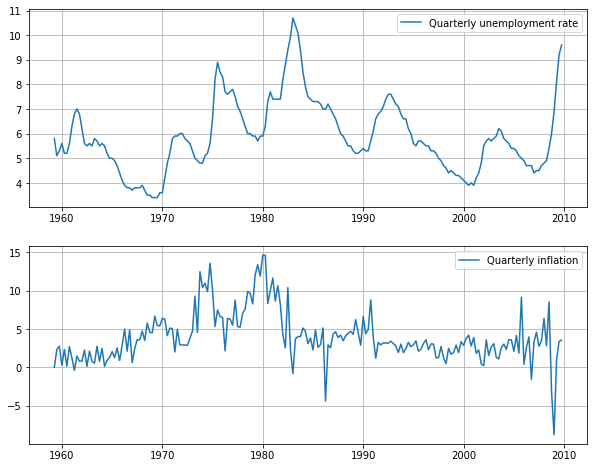

In [34]:
# Fetching the data
unemp = data.unemp
inf = data.infl

# Plotting the series
plt.figure(8, figsize=(10,8))
plt.subplot(211)
plt.plot(unemp, label='Quarterly unemployment rate')
plt.legend()
plt.grid()

plt.subplot(212)
plt.plot(inf, label='Quarterly inflation')
plt.legend()
plt.grid()

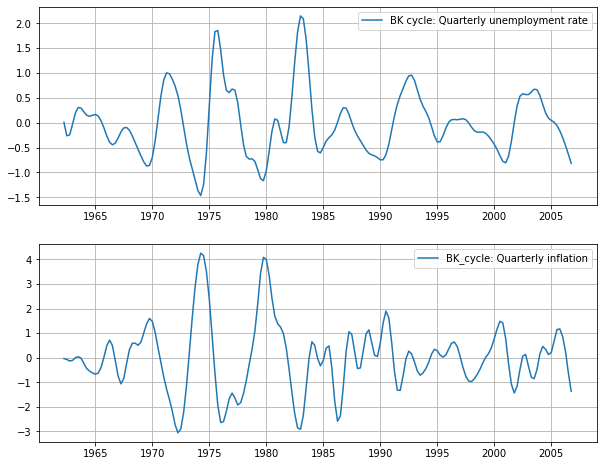

In [35]:
# Applying the BK filter to both series
unemp_bk = sm.tsa.filters.bkfilter(unemp)
inf_bk = sm.tsa.filters.bkfilter(inf)

# Plotting the stationary/cyclic series
plt.figure(8, figsize=(10,8))
plt.subplot(211)
plt.plot(unemp_bk, label='BK cycle: Quarterly unemployment rate')
plt.legend()
plt.grid()

plt.subplot(212)
plt.plot(inf_bk, label='BK cycle: Quarterly inflation')
plt.legend()
plt.grid()

`statsmodels` can also perform Christiano-Fitzgerald filterning for random walks. See [the `statsmodels` documentation](https://www.statsmodels.org/dev/examples/notebooks/generated/tsa_filters.html)  for an application.



#### tests of co-integration and stationarity, and unit roots

Augmented Dickey-Fuller unit root test,
Durbin test



### PyMC3

### References

**Baxter, M., and R. G. King** (1999). "Measuring business cycles: Approximate band-pass filters for economic time series". *Review of Economics
and Statistics* 81: 575–593.